In [345]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from warnings import filterwarnings
filterwarnings("ignore")

In [346]:
df = pd.read_csv("titanic.csv")
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# Data Processing

### 1. Data Understanding

In [347]:
cols_to_drop = ["PassengerId", "Name", "Ticket"]
df.drop(cols_to_drop, axis=1, inplace=True)

In [348]:
columns = df.columns.tolist()
columns.append(columns.pop(0))
df = df[columns]

In [349]:
pd.DataFrame({"Dtype": df.dtypes, "Num_Uniq": df.nunique()}).T

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
Dtype,int64,object,float64,int64,int64,float64,object,object,int64
Num_Uniq,3,2,88,7,7,248,147,3,2


### 2. Check for Dtypes

In [350]:
cat_cols = ["Sex", "Cabin", "Embarked", "Pclass", "SibSp", "Parch", "Survived"]
df[cat_cols] = df[cat_cols].astype("category")
pd.DataFrame({"Dtype": df.dtypes, "Num_Uniq": df.nunique()}).T

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
Dtype,category,category,float64,category,category,float64,category,category,category
Num_Uniq,3,2,88,7,7,248,147,3,2


### 3. Check for Null values 

In [351]:
null = df.isnull().sum()
null_ratio = df.isnull().sum() / df.shape[0]
pd.DataFrame({"Null": null, "Ratio": null_ratio}).T

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
Null,0.0,0.0,177.000000,0.0,0.0,0.0,687.000000,2.000000,0.0
Ratio,0.0,0.0,0.198653,0.0,0.0,0.0,0.771044,0.002245,0.0


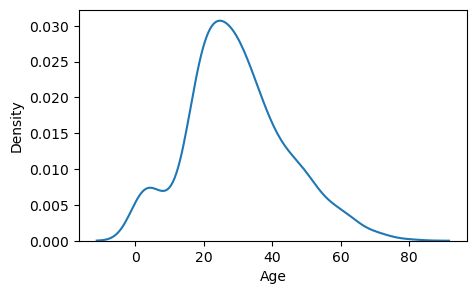

In [352]:
plt.figure(figsize=(5, 3))
sns.kdeplot(df.Age)
plt.show()

**Rplace null values in Age with median**
- The null ratio is not very large and is not small
- The distribution of median is right skewed 

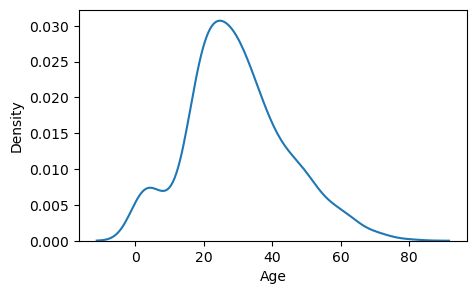

In [353]:
plt.figure(figsize=(5, 3))
sns.kdeplot(df.Age)
plt.show()

In [354]:
# df.Age.replace(np.nan, df.Age.median())
df.Age.fillna(df.Age.median(), inplace=True)

**Drop null values in Embarked columns**
- Null ratio is small

In [355]:
df.dropna(subset=["Embarked"], inplace=True)

**Drop Cabin column**
- Has very large null ratio

In [356]:
df.drop(["Cabin"], axis=1, inplace=True)

**Check after handling null values**

In [357]:
null = df.isnull().sum()
null_ratio = df.isnull().sum() / df.shape[0]
pd.DataFrame({"Null": null, "Ratio": null_ratio}).T

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3. Check for Outliers

**Boxplot visualization**

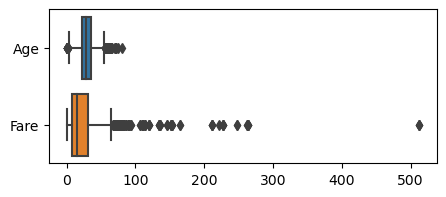

In [358]:
plt.figure(figsize=(5, 2))
sns.boxplot(df, orient='h')
plt.show()

**Check for outliers using IQR**

In [359]:
Q1 = np.quantile(df["Age"], .25)
Q3 = np.quantile(df["Age"], .75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR 
upper = Q3 + 1.5 * IQR 

print(upper)
df[df["Age"] > upper ]["Age"].values

# df["Age"].replace(upper, 4)

54.5


array([58. , 55. , 66. , 65. , 59. , 71. , 70.5, 55.5, 61. , 56. , 58. ,
       59. , 62. , 58. , 63. , 65. , 61. , 60. , 64. , 65. , 56. , 63. ,
       58. , 55. , 71. , 64. , 62. , 62. , 60. , 61. , 57. , 80. , 56. ,
       58. , 70. , 60. , 60. , 70. , 57. , 74. , 56. ])

In [360]:
num_cols = df.select_dtypes("number").columns.tolist()
for col in num_cols:
    Q1 = np.quantile(df[col], .25)
    Q3 = np.quantile(df[col], .75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR 
    upper = Q3 + 1.5 * IQR 
    
    lower_outliers = df[df[col] < lower][col].values
    upper_outliers = df[df[col] > upper][col].values
    
    df[col].replace(upper_outliers, upper, inplace=True)
    df[col].replace(lower_outliers, lower, inplace=True)
    

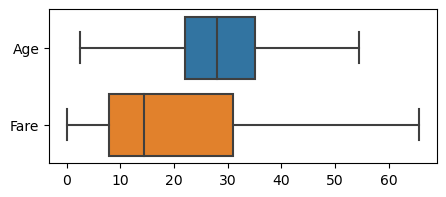

In [361]:
plt.figure(figsize=(5, 2))
sns.boxplot(df, orient='h')
plt.show()

### 5. Visualization

In [362]:
pd.DataFrame(df.dtypes).T

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,category,category,float64,category,category,float64,category,category


**Numerical cols visualization**
- Drop 

In [363]:
num_cols

['Age', 'Fare']

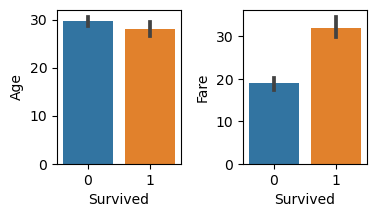

In [364]:
num_cols = df.select_dtypes("number").columns.tolist()
plt.figure(figsize=(4, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.barplot(x="Survived", y=col, data=df)
plt.subplots_adjust(hspace=3, wspace=.5)
plt.show()

In [365]:
# df.drop(["Age"], axis=1, inplace=True)

**Categorical cols visualization**

In [366]:
cat_cols = df.select_dtypes("category").columns.tolist()


Sex,female,male
Survived,,
0,81,468
1,231,109


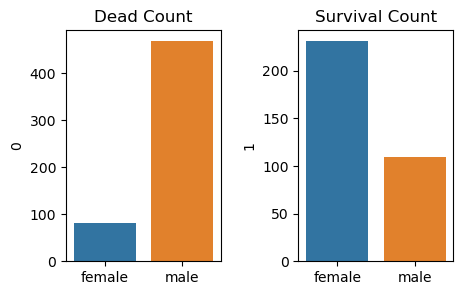

In [367]:
agg = df.pivot_table(index="Survived", columns="Sex", values="Fare", aggfunc=len)
display(agg)

dead = agg.iloc[0]
surv = agg.iloc[1]
sex = agg.columns.tolist()

plt.figure(figsize=(5, 3))

plt.subplot(1, 2, 1)
plt.title("Dead Count")
sns.barplot(x=sex, y=dead)

plt.subplot(1, 2, 2)
plt.title("Survival Count")
sns.barplot(x=sex, y=surv)

plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

Pclass & Survival


Pclass,1,2,3
Survived,,,
0,80,97,372
1,134,87,119


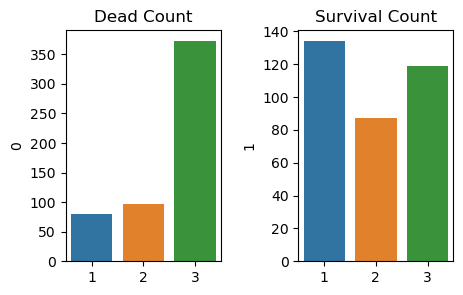

Sex & Survival


Sex,female,male
Survived,,
0,81,468
1,231,109


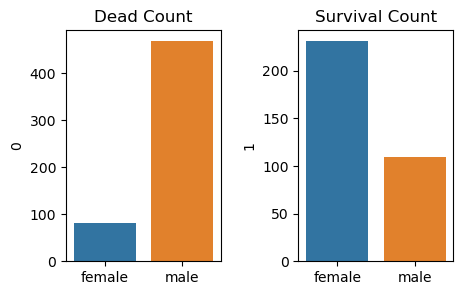

SibSp & Survival


SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398.0,97.0,15.0,12.0,15.0,5.0,7.0
1,208.0,112.0,13.0,4.0,3.0,NaN,NaN


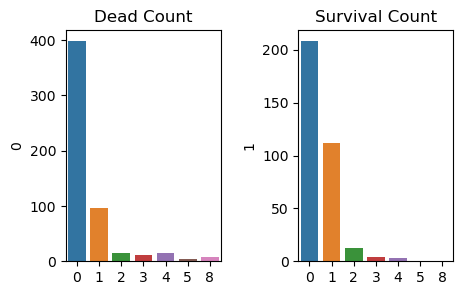

Parch & Survival


Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445.0,53.0,40.0,2.0,4.0,4.0,1.0
1,231.0,65.0,40.0,3.0,NaN,1.0,NaN


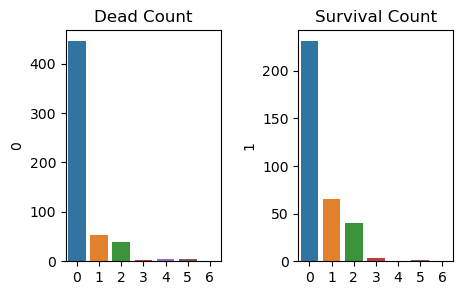

Embarked & Survival


Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


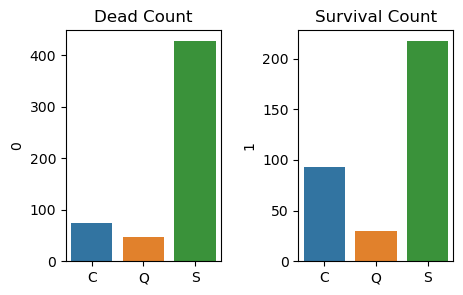

In [368]:
for col in cat_cols[:-1]:
    agg = df.pivot_table(index="Survived", columns=col, values="Fare", aggfunc=len)

    dead = agg.iloc[0]
    surv = agg.iloc[1]
    cats = agg.columns.tolist()
    
    print(f"{col} & Survival")
    display(agg)
    plt.figure(figsize=(5, 3))

    plt.subplot(1, 2, 1)
    plt.title("Dead Count")
    sns.barplot(x=cats, y=dead)

    plt.subplot(1, 2, 2)
    plt.title("Survival Count")
    sns.barplot(x=cats, y=surv)

    plt.subplots_adjust(hspace=.5, wspace=.5)
    plt.show()
    print("===============================")

In [369]:
# df.drop(["Parch", "SibSp"], axis =1, inplace=True)

In [370]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,65.6563,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,28.0,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


### 7. Check for Duplicates

In [371]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())


129
0


### 8. Data Split 

In [372]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=1)


### 9. Normalization

In [373]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[["Fare"]] = scaler.fit_transform(X_train[["Fare"]])
X_val[["Fare"]] = scaler.transform(X_val[["Fare"]])
X_test[["Fare"]] = scaler.transform(X_test[["Fare"]])


### 10. Encoding
- We apply one hot encoding to Sex & Embarked since they both are nominal

In [374]:
X_train = pd.get_dummies(X_train, columns=["Sex", "Embarked"], drop_first=True)
X_val = pd.get_dummies(X_val, columns=["Sex", "Embarked"], drop_first=True)
X_test = pd.get_dummies(X_test, columns=["Sex", "Embarked"], drop_first=True)


In [375]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
821,3,27.0,0,0,0.131937,1,0,1
487,1,54.5,0,0,0.452356,1,0,0
617,3,26.0,1,0,0.245216,0,0,1
448,3,5.0,2,1,0.293320,0,0,0
357,2,38.0,0,0,0.198001,0,0,1
...,...,...,...,...,...,...,...,...
279,3,35.0,1,1,0.308424,0,0,1
806,1,39.0,0,0,0.000000,1,0,1
816,3,23.0,0,0,0.120704,0,0,1
622,3,20.0,1,1,0.239759,1,0,0


# Logistic Regression

In [376]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**Evaluation**

In [377]:
from sklearn.metrics import accuracy_score
tr_pred = model.predict(X_train)
val_pred = model.predict(X_val)
print(accuracy_score(y_train, tr_pred))
print(accuracy_score(y_val, val_pred))


0.7921810699588477
0.7622950819672131


# SVM

In [378]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

**Evaluation**

In [379]:
from sklearn.metrics import accuracy_score
tr_pred = model.predict(X_train)
val_pred = model.predict(X_val)
print(accuracy_score(y_train, tr_pred))
print(accuracy_score(y_val, val_pred))


0.6069958847736625
0.6147540983606558


# Decision Tree

In [380]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [381]:
from sklearn.metrics import accuracy_score
tr_pred = model.predict(X_train)
val_pred = model.predict(X_val)
print(accuracy_score(y_train, tr_pred))
print(accuracy_score(y_val, val_pred))


0.9835390946502057
0.680327868852459


# Random Forest

In [382]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [383]:
from sklearn.metrics import accuracy_score
tr_pred = model.predict(X_train)
val_pred = model.predict(X_val)
print(accuracy_score(y_train, tr_pred))
print(accuracy_score(y_val, val_pred))


0.9835390946502057
0.7295081967213115


# XGBoost

In [384]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [385]:
from sklearn.metrics import accuracy_score
tr_pred = model.predict(X_train)
val_pred = model.predict(X_val)
print(accuracy_score(y_train, tr_pred))
print(accuracy_score(y_val, val_pred))


0.911522633744856
0.8278688524590164


# Naive Bayes

In [386]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [387]:
from sklearn.metrics import accuracy_score
tr_pred = model.predict(X_train)
val_pred = model.predict(X_val)
print(accuracy_score(y_train, tr_pred))
print(accuracy_score(y_val, val_pred))


0.7613168724279835
0.7786885245901639
